# RESPOSTAS AS QUESTÕES FORMULADAS

## ❓ Perguntas 
1.  Como evoluiu a declaração étnica ao longo do tempo?
2.  Como evoluiu o perfil étnico da universidade ao longo do tempo, em particular no pré, durante e pós pandemia?
3.  Qual é a relação entre a cota de ingresso dos alunos e sua região (estado/sub-região?) de origem?
4.  A quarentena influenciou a diversidade regional dos alunos? Se sim, como?
5.  A quarentena influenciou a ingreso mais diverso de alunos em relação ao gênero no curso de Ciência da Computação? Se sim, como?
6.  Como a demanda por curso foi afetada pela passagem do tempo? E pela pandemia?
7.  Qual é o tempo de permanência média por curso ao longo do tempo? (destaque para a pandemia)
8.  Como evoluíram as notas do enem por curso ao longo do tempo (por ano)? E como foi essa evolução por contas?
9.  Como é a média do CR por curso e por ano?
10. Qual campus recebe mais pessoas de fora do estado de Minas Gerais?
11. O tempo de duração definido para os cinco cursos mais frequentados condiz com a media de duração gasto pelos alunos?


## Imports básicos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math
import unidecode
import Funcoes

##  Lendo dataframe


In [2]:
df = pd.read_csv("../Datasets/dadosFiltrados.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74026 entries, 0 to 74025
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identificador            74026 non-null  int64  
 1   Ano_Nascimento           73949 non-null  float64
 2   Sexo                     73986 non-null  object 
 3   Campus                   74026 non-null  object 
 4   Curso_Identificador      74026 non-null  int64  
 5   Curso                    74026 non-null  object 
 6   UF_Nascimento            73965 non-null  object 
 7   Municipio_Nascimento     74026 non-null  object 
 8   Admissao                 74026 non-null  object 
 9   Saida                    74026 non-null  object 
 10  Codigo_Situacao_Aluno    74026 non-null  object 
 11  Situacao_Aluno           74026 non-null  object 
 12  Situacao_Aluno_Agrupada  74026 non-null  object 
 13  Modalidade_Inscrita      68753 non-null  float64
 14  ENEM                  

In [3]:
df['Sexo'] = df['Sexo'].astype(str)
df['Campus'] = df['Campus'].astype(str)
df['Curso'] = df['Curso'].astype(str)
df['UF_Nascimento'] = df['UF_Nascimento'].astype(str)
df['Municipio_Nascimento'] = df['Municipio_Nascimento'].astype(str)
df['Admissao'] = df['Admissao'].astype(str)
df['Saida'] = df['Saida'].astype(str)
df['Codigo_Situacao_Aluno'] = df['Codigo_Situacao_Aluno'].astype(str)
df['Situacao_Aluno'] = df['Situacao_Aluno'].astype(str)
df['Situacao_Aluno_Agrupada'] = df['Situacao_Aluno_Agrupada'].astype(str)
df['Raca'] = df['Raca'].astype(str)

## Resposta 1: 

- Como evoluiu a declaração étnica ao longo do tempo?


Após algumas plotagens dos gráficos, percebeu-se que a quantidade de pessoas que entravam nos períodos pares (segundo semetre de cada ano e disciplinas de verão) não era significativa. Por conta disso e para melhor visualização dos dados, usou-se como base a quantidade de entradas por ano, e não por semestre

In [ ]:
dfEtnico = df[['Raca','Admissao']]
dfEtnico['Admissao'] = dfEtnico['Admissao'].apply(lambda x : str(x)[:4]) #Pegando apenas o ano
dfEtnicoPorPeriodo = dfEtnico.groupby('Admissao').value_counts().reset_index().sort_values(by='Admissao') # Agrupando as raças por ano
dfEtnicoPorPeriodo


In [ ]:
dfEtnico = df[['Raca','Admissao']]
dfEtnico['Admissao'] = dfEtnico['Admissao'].apply(lambda x : str(x)[:4])
dfEtnicoPorPeriodo = dfEtnico.groupby('Admissao').value_counts().reset_index().sort_values(by='Admissao')

plt.figure(figsize=(17,5))
dfBrancos = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Branco(a)']
dfPretos = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Preto(a)']
dfIndiponivel = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Informação não disponível']
dfAmarelo = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Amarelo(a)']
dfPardo = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Pardo(a)']
dfIndigena = dfEtnicoPorPeriodo[dfEtnicoPorPeriodo['Raca'] == 'Indígena']

# Plotando gráfico de linhas para visualizar evolução ao longo do tempo
plt.plot(dfBrancos['Admissao'], dfBrancos['count'], label='Branco(a)', linewidth=3)
plt.plot(dfPretos['Admissao'], dfPretos['count'], label='Preto(a)', linewidth=3)
plt.plot(dfIndigena['Admissao'], dfIndigena['count'], label='Indigena', linewidth=3)
plt.plot(dfIndiponivel['Admissao'], dfIndiponivel['count'], label='Indisponível', linewidth=3)
plt.plot(dfPardo['Admissao'], dfPardo['count'], label='Pardo(a)', linewidth=3)
plt.plot(dfAmarelo['Admissao'], dfAmarelo['count'], label='Amarelo(a)', linewidth=3)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Data de Admissao')
plt.ylabel('Quantidade')
plt.show()

No gráfico acima, podemos perceber que a declaração étnica ao longo do tempo teve uma melhora significativa ao longo dos anos. Antes de 2007, a grande maioria dos alunos não se classificava étnicamente. 

Porém, entre 2006 e 2009 podemos ver um crescimento bastante significativo da declaração de identidade racial dos alunos, atingindo uma certa estabilidade entre 2011 e 2018.

Uma das coisas que se pode perceber é que os dados do dataset seguem uma distribuição de raças bem próxima à da realidade brasileira. Consultando sites como [agencia-noticias](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/38719-censo-2022-pela-primeira-vez-desde-1991-a-maior-parte-da-populacao-do-brasil-se-declara-parda), podemos perceber esse padrão.

![Raças no Brasil](Imagens/racas.png)

Uma das possíveis interpretações desses dados é que a população brasileira passou a se identificar mais com suas raças, não só devido a conscientização de pensamentos sobre identidade cultural e pela maior incentivo à valorização dessas identidades, mas também pode se tratar de um reflexo da implementação de leis, tais como a [lei de cotas de 2012](http://portal.mec.gov.br/component/tags/tag/politica-de-cotas#:~:text=A%20política%20de%20cotas%20foi,proposta%20foi%20aprovada%20por%20unanimidade.), que podem ter servido de incentivo para a melhoria desse quadro


## Resposta 2:
- Como evoluiu o perfil étnico da universidade ao longo do tempo, em particular no pré, durante e pós pandemia?


In [ ]:
dfEtnico = df[['Raca', 'Admissao_Ano']]
dfEtnicoAntes = dfEtnico[dfEtnico['Admissao_Ano'] < 2020]
dfEtnicoDurante = dfEtnico[dfEtnico['Admissao_Ano'] >= 2019]
dfEtnicoPorPeriodoAntes = dfEtnicoAntes.groupby('Admissao_Ano').value_counts().reset_index().sort_values(by='Admissao_Ano')
dfEtnicoPorPeriodoDurante = dfEtnicoDurante.groupby('Admissao_Ano').value_counts().reset_index().sort_values(by='Admissao_Ano')


# plotando antes da pandemia
plt.figure(figsize=(17,5))
dfBrancosAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Branco(a)']
dfPretosAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Preto(a)']
dfIndiponivelAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Informação não disponível']
dfAmareloAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Amarelo(a)']
dfPardoAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Pardo(a)']
dfIndigenaAntes = dfEtnicoPorPeriodoAntes[dfEtnicoPorPeriodoAntes['Raca'] == 'Indígena']

# Plotando gráfico de linhas para visualizar evolução ao longo do tempo
datas = np.sort(dfEtnicoAntes['Admissao_Ano'].unique())
plt.plot(dfBrancosAntes['Admissao_Ano'], dfBrancosAntes['count'], label='Branco(a)', linewidth=3)
plt.plot(dfPretosAntes['Admissao_Ano'], dfPretosAntes['count'], label='Preto(a)', linewidth=3)
plt.plot(dfIndigenaAntes['Admissao_Ano'], dfIndigenaAntes['count'], label='Indigena', linewidth=3)
plt.plot(dfIndiponivelAntes['Admissao_Ano'], dfIndiponivelAntes['count'], label='Indisponível', linewidth=3)
plt.plot(dfPardoAntes['Admissao_Ano'], dfPardoAntes['count'], label='Pardo(a)', linewidth=3)
plt.plot(dfAmareloAntes['Admissao_Ano'], dfAmareloAntes['count'], label='Amarelo(a)', linewidth=3)
plt.xticks(datas.astype(int), rotation=90)

plt.legend()
plt.xlabel('Data de Admissao')
plt.ylabel('Quantidade')
plt.title("Perfil étnico antes da pandemia")
plt.show()

#plotando durante pandemia
plt.figure(figsize=(17,5))
dfBrancosDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Branco(a)']
dfPretosDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Preto(a)']
dfIndiponivelDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Informação não disponível']
dfAmareloDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Amarelo(a)']
dfPardoDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Pardo(a)']
dfIndigenaDurante = dfEtnicoPorPeriodoDurante[dfEtnicoPorPeriodoDurante['Raca'] == 'Indígena']

# Plotando gráfico de linhas para visualizar evolução ao longo do tempo
datas = np.sort(dfEtnicoDurante['Admissao_Ano'].unique())
plt.plot(dfBrancosDurante['Admissao_Ano'], dfBrancosDurante['count'], label='Branco(a)', linewidth=3)
plt.plot(dfPretosDurante['Admissao_Ano'], dfPretosDurante['count'], label='Preto(a)', linewidth=3)
plt.plot(dfIndigenaDurante['Admissao_Ano'], dfIndigenaDurante['count'], label='Indigena', linewidth=3)
plt.plot(dfIndiponivelDurante['Admissao_Ano'], dfIndiponivelDurante['count'], label='Indisponível', linewidth=3)
plt.plot(dfPardoDurante['Admissao_Ano'], dfPardoDurante['count'], label='Pardo(a)', linewidth=3)
plt.plot(dfAmareloDurante['Admissao_Ano'], dfAmareloDurante['count'], label='Amarelo(a)', linewidth=3)
plt.xticks(datas.astype(int), rotation=90)

plt.legend()
plt.xlabel('Data de Admissao')
plt.ylabel('Quantidade')
plt.title("Perfil étnico durante a pandemia")
plt.show()

Como podemos observar nos gráficos em 2008 houve um crescente avanço na declaração de etnias com seu ápice em 2018, posteriormente em 2019 houve um aumento significativo dos dados indísponíveis mas em 2020 voltou a se estabilizar

Com o crescente aumento da declaração foi possível observar que em todos os gráficos a declaração branca sempre foi maior, seguido da declaração parda e preta.

As declarações amarela e indígena, mesmo com o aumento dos dados disponíveis, sempre foram baixas, o que nos indica uma baixa representatividade destas declarações 

É valido observar também que a maior crescente se deu dado as disponibilidades dos dados.

## Resposta 3:
- Qual é a relação entre a cota de ingresso dos alunos e sua região (estado/sub-região?) de origem?

Nessa questão, optou-se por realizar a análise com base na região, para tornar os dados mais claros na visualização.

In [ ]:
# CSV que associa estados a regiões
dfRegioes = pd.read_csv("../Datasets/EstadosERegioes.csv")

t = df[["UF_Nascimento", "Modalidade_Inscrita"]].copy(deep=True)
t = t[t["Modalidade_Inscrita"] != 0] # ignorando modalidade não informada

# Agrupando os dados por região e convertendo para porcentagem
cotas_regioes = t.merge(dfRegioes, on='UF_Nascimento')[["Regiao", "Modalidade_Inscrita"]]
cotas_regioes = cotas_regioes.groupby("Regiao").value_counts(normalize=True).unstack()
cotas_regioes = cotas_regioes.mul(100).round(2).fillna(0).reset_index()

# Gráfico
cotas_regioes.index = cotas_regioes["Regiao"]
cotas_regioes.plot(kind="bar", figsize=(10,10))
plt.yscale("log")
plt.xticks(rotation=0)
plt.show()

cotas_regioes

## Resposta 4: 
- A quarentena influenciou a diversidade regional dos alunos? Se sim, como?

Nessa questão, optou-se por realizar a análise com base na região, para tornar os dados mais claros de visualizar. Para a região sudeste, por ser região de origem da grande maioria dos alunos, foi feita também uma análise por estado. Em ambas as análises, não constatou-se impacto da pandemia na diversidade regional.

In [ ]:
# CSV que associada estados a regiões
dfRegioes = pd.read_csv("../Datasets/EstadosERegioes.csv")

# Ignorando 2023, pois seus dados regionais são insuficientes (incompletos)
t = df[["Admissao_Ano", "UF_Nascimento"]]
admissao_geo = t.merge(dfRegioes, on="UF_Nascimento")
admissao_geo = admissao_geo[admissao_geo["Admissao_Ano"] != 2023]

# Agrupando por região e convertendo para porcentagem
admissao_regiao = admissao_geo[["Admissao_Ano", "Regiao"]]
admissao_regiao = admissao_regiao.groupby("Admissao_Ano").value_counts(normalize=True).unstack()
admissao_regiao = admissao_regiao.mul(100).round(2).reset_index()

# Gráfico por região
plt.figure(figsize=(17,5))
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Norte"], label="Norte")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Nordeste"], label="Nordeste")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Centro-oeste"], label="Centro-oeste")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Sudeste"], label="Sudeste")
plt.plot(admissao_regiao["Admissao_Ano"], admissao_regiao["Sul"], label="Sul")
plt.yscale("log")
plt.ylabel("Porcentagem de alunos admitidos")
plt.xlabel("Ano de Admissão")
plt.title("Distribuição regional percentual dos alunos admitidos na UFV a cada ano")
plt.legend()
plt.show()

# Filtrando pela região sudeste, agrupando por estado e convertendo para porcentagem
admissao_sudeste = admissao_geo[admissao_geo["Regiao"] == "Sudeste"][["UF_Nascimento", "Admissao_Ano"]]
admissao_sudeste = admissao_sudeste.groupby("Admissao_Ano").value_counts(normalize=True).unstack()
admissao_sudeste = admissao_sudeste.mul(100).round(200).reset_index()

# Gráfico por estado do sudeste
plt.figure(figsize=(17,5))
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["MG"], label="Minas Gerais")
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["SP"], label="São Paulo")
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["ES"], label="Espírito Santo")
plt.plot(admissao_sudeste["Admissao_Ano"], admissao_sudeste["RJ"], label="Rio de Janeiro")
plt.ylabel("Porcentagem de alunos do Sudeste admitidos")
plt.xlabel("Ano de Admissão")
plt.title("Distribuição estadual percentual dos alunos do Sudeste admitidos na UFV a cada ano")
plt.legend()
plt.show()

admissao_regiao

## Resposta 5
-  A quarentena influenciou a ingreso mais diverso de alunos em relação ao gênero no curso de Ciência da Computação? Se sim, como?

In [ ]:
# Quarentena (a partir do 1º ano que houve ingressantes, 2020 a 2022)
dfQ5 = df.copy()

dfQ5 = dfQ5[dfQ5['Curso'] == 'CIENCIA DA COMPUTACAO']

dfQ5_prePandemia = dfQ5[dfQ5['Admissao_Ano'] < 2020]
dfQ5_posPandemia = dfQ5[dfQ5['Admissao_Ano'] >= 2020]

dfQ5_prePandemia_genero = dfQ5_prePandemia['Sexo'].value_counts(normalize=True).reset_index()
dfQ5_prePandemia_genero['proportion'] = dfQ5_prePandemia_genero['proportion'] * 100
dfQ5_posPandemia_genero = dfQ5_posPandemia.groupby('Admissao_Ano')['Sexo'].value_counts(normalize=True).reset_index()
dfQ5_posPandemia_genero['proportion'] = dfQ5_posPandemia_genero['proportion'] * 100

plt.figure(figsize=(10, 9))

plt.subplot(2, 2, 1)  
plt.bar(data=dfQ5_prePandemia_genero, x='Sexo', height='proportion')
plt.xticks(rotation=0)
plt.title('Pré-pandemia')
plt.yticks(range(0, 101, 5))



count = 2
for admissao in (dfQ5_posPandemia_genero['Admissao_Ano'].unique()):
    plt.subplot(2, 2, count)  # Definindo o subplot para o campus atual
    plt.bar(data=dfQ5_posPandemia_genero[dfQ5_posPandemia_genero['Admissao_Ano'] == admissao], x='Sexo', height='proportion')
    plt.title(f'Pós-pandemia ({admissao})')
    plt.yticks(range(0, 101, 5))
    count+=1

print(dfQ5_prePandemia_genero)
dfQ5_posPandemia_genero

plt.show()


## Resposta 6:
- Como a demanda por curso foi afetada pela passagem do tempo? E pela pandemia?


In [ ]:
# Quarentena (a partir do 1º ano que houve ingressantes, 2020 a 2022)
dfQ5 = df.copy()

dfQ5_prePandemia = dfQ5[dfQ5['Admissao_Ano'] < 2020]
dfQ5_posPandemia = dfQ5[dfQ5['Admissao_Ano'] >= 2020]

pre_cursos_count = dfQ5_prePandemia['Curso'].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False)
pos_cursos_count = dfQ5_posPandemia['Curso'].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False)

pre_cursos_count['proportion'] = pre_cursos_count['proportion'] * 100
pos_cursos_count['proportion'] = pos_cursos_count['proportion'] * 100

pre_cursos_count
# pos_cursos_count

## Resposta 7:
- Qual é o tempo de permanência média por curso ao longo do tempo? (destaque para a pandemia)

Para ver como a pandemia infuenciou o tempo de duração, basta calcular o tempo de duração do curso antes da pandemia 
(pessoas que se formaram antes da pandemia) e calcular o tempo de duração do curso das pessoas que em algum momento
tiveram contato com a pandemia (pessoas que saíram durante e depois de 2020)

In [ ]:
# Copiar o DataFrame
dfQ7 = df.copy()

# Remover entradas com 'Saida' igual a '0'
dfQ7 = dfQ7.drop(dfQ7[dfQ7['Saida'] == '0'].index)

# Filtrar apenas os alunos com status de curso concluído
dfQ7 = dfQ7[dfQ7['Codigo_Situacao_Aluno'].isin(['C', 'B', 'I'])]


# Calcular o tempo de duração
dfQ7['TempoDuracao'] = dfQ7['Saida_Ano'] - dfQ7['Admissao_Ano']

# Separa os alunos que não passaram pela pandemia
dfSemPandemia = dfQ7[dfQ7['Saida_Ano'] < 2020]

# Separa os alunos que passaram pela pandemia
dfComPandemia = dfQ7[dfQ7['Saida_Ano'] >= 2020]

dfSemPandemia_cursos = dfSemPandemia.groupby('Curso')['TempoDuracao'].mean().reset_index()
#dfSemPandemia_cursos['TempoDuracao'] = round(dfSemPandemia_cursos['TempoDuracao'])

dfComPandemia_cursos = dfComPandemia.groupby('Curso')['TempoDuracao'].mean().reset_index()
#dfComPandemia_cursos['TempoDuracao'] = round(dfComPandemia_cursos['TempoDuracao'])



# Mostrar os resultados
print("\t\tTempo de duração dos cursos antes da pandemia")
dfSemPandemia_cursos.set_index('Curso', inplace=True)
display(dfSemPandemia_cursos)

print("\n\t\tTempo de duração dos cursos depois da pandemia")
dfComPandemia_cursos.set_index('Curso', inplace=True)
display(dfComPandemia_cursos)

print("\n\t\tDiferença no tempo de duração dos cursos, antes e depois da pandemia")
diferençaTempo = dfComPandemia_cursos.copy()
diferençaTempo['TempoDuracao'] = dfComPandemia_cursos['TempoDuracao'].sub(dfSemPandemia_cursos['TempoDuracao'])
display(diferençaTempo)

computaçãoConcluidoSP = dfSemPandemia[dfSemPandemia['Curso'] == 'CIENCIA DA COMPUTACAO']
computaçãoConcluidoSP = computaçãoConcluidoSP[["Identificador", "TempoDuracao"]] 
computaçãoConcluidoSP.groupby('TempoDuracao').count().plot(kind='bar', color='#EF2D56')
plt.title("Antes da pandemia")
plt.show()

computaçãoConcluidoCP = dfComPandemia[dfComPandemia['Curso'] == 'CIENCIA DA COMPUTACAO']
computaçãoConcluidoCP = computaçãoConcluidoCP[["Identificador", "TempoDuracao"]] 
computaçãoConcluidoCP.groupby('TempoDuracao').count().plot(kind='bar', color='#EF2D56')
plt.title("Depois da pandemia")
plt.show()

Identificador são as matrículas dos alunos, (esses gráficos contaram quantos alunos concluiram o curso antes e depois da pandemia)
com os gráficos e com a tabela criada foi possível identificar que houve um aumento médio no tempo que os alunos demorarm para concluir o curso.

Tendo um olhar para o curso de computação foi adicionado de um semestre a um ano a mais (visto que há alunos que entraram em semestre impares) para finalização do curso. Não é possível ver se a pandemia impactou a longo prazo pois não há dados suficientes, mas com o que temos vimos que a curto e médio prazo gerou um certo impacto.

## Resposta 8: 
- Como evoluíram as notas do enem nos três campus, ao longo do tempo (por ano)? E como foi essa evolução por cotas?


### Evolução por Campus

In [ ]:
# Criando um DataFrame para manipulação desta questão
dfQ8 = df[['ENEM', 'Admissao_Ano', 'Modalidade_Inscrita', 'Campus']]
# Convertendo valores para numerico
dfQ8['ENEM'] = pd.to_numeric(dfQ8['ENEM'], errors='coerce')
# Dropando valores de notas nulos
dfQ8 = dfQ8.dropna(subset=['ENEM'])

# Media dos campus por ano de admissão
dfQ8 = dfQ8.groupby(['Campus', 'Admissao_Ano'])['ENEM'].mean().reset_index().sort_values(by='Admissao_Ano')

plt.figure(figsize=(17,5))

# Para cada campus uma linha (uma plotagem)
for campus in dfQ8['Campus'].unique():
    campus_data = dfQ8[dfQ8['Campus'] == campus]
    plt.plot(campus_data['Admissao_Ano'], campus_data['ENEM'], label=campus, linewidth=3)

plt.xlabel('Ano de Admissão')
plt.ylabel('Nota Média do ENEM')
plt.title('Evolução das Notas do ENEM por campus da UFV ao Longo do Tempo')
plt.legend(title='Campus')
plt.grid(True)
plt.xticks(rotation=45)  # Rotacionar os rótulos dos anos se necessário
plt.show()



### Evolução por Cotas em cada Campus

In [ ]:
# Criando um DataFrame para manipulação desta questão
dfQ8 = df[['ENEM', 'Admissao_Ano', 'Modalidade_Inscrita', 'Campus']]

# Dropando valores de notas nulos
dfQ8 = dfQ8.dropna(subset=['ENEM'])

# Media dos campus e cotas por ano de admissão
dfQ8 = dfQ8.groupby(['Campus', 'Admissao_Ano', 'Modalidade_Inscrita'])['ENEM'].mean().reset_index().sort_values(by='Admissao_Ano')

num_campus = len(dfQ8['Campus'].unique())
plt.figure(figsize=(15, 8 * num_campus))

count = 1
# Para cada campus uma plotagem --> configurando para CADA grafico
for campus in dfQ8['Campus'].unique():
    plt.subplot(num_campus, 1, count)  # Definindo o subplot para o campus atual
    campus_data = dfQ8[dfQ8['Campus'] == campus]
    sns.lineplot(data=campus_data, x='Admissao_Ano', y='ENEM', hue='Modalidade_Inscrita', palette=sns.color_palette(), linewidth=3)
    plt.title(f'Evolução das Notas do ENEM - {campus}')
    plt.xlabel('Ano de Admissão')
    plt.ylabel('Nota Média do ENEM')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotacionar os rótulos dos anos se necessário
    plt.tight_layout()  # Ajustar layout para evitar sobreposição
    count += 1
    
    
plt.show()


# dfQ8


## Resposta 9:
- Como é a média do CR por curso e por ano?

### Análise do CRA por curso

Vamos selecionar as colunas que importam para essa questão

In [ ]:
dfCRACurso = df[['CRA', 'Curso']]

Realizando a média do CRA por cursos, tem-se:

In [ ]:
dfCRACurso.groupby('Curso').mean()

Como existem 56 cursos, a visualização dos dados torna-se muito difícil de ser realizada. Por conta disso, se decidiu avaliar pro ÁREA e não por CURSO. Dessa forma, nós criamos um _dataset_ com diversas áreas e os cursos que elas contém, para facilitar o tratamento. Isso foi feito manualmente. Os dados foram obtidos no link [Categorias de cursos](https://www.ibirapuera.br/veja-como-e-feita-a-divisao-dos-cursos-de-graduacao-entre-as-areas-de-conhecimento/)

In [ ]:
# Lendo o CSV com as Áreas e Cursos
dfAreasECursos = pd.read_csv('../Datasets/AreasECursos.csv')
dfAreasECursos

In [ ]:
dfCRAArea = df[['Area','CRA']]
df

Plotando gráfico:


In [ ]:
dfCRAArea = dfCRAArea.groupby('Area').mean().sort_values(by='CRA', ascending=False)
sns.barplot(dfCRAArea, y='Area', x='CRA', color="#ff0000", errorbar=None)
plt.title('CRA por Área')

#### Análise de CRA por Ano

Observe que o CRA é o Coeficiente de Rendimento Acumulado, ou seja, a média dos CRs desde a entrada do estudante no curso até sua saída. Logo, se desejamos saber qual a média de CRA por ano, devemos pegar apenas os anos de saída, pois são nesses anos que foi calculado pela última vez o CRA do aluno

In [ ]:
# Pegando dados que importam
dfQ13porAno = df[['CRA', 'Saida_Ano']]
dfQ13porAno

In [ ]:
dfQ13porAno = dfQ13porAno.groupby('Saida_Ano').mean('CRA').reset_index()
dfQ13porAno['Saida_Ano'].size

In [ ]:
# sns.barplot(dfQ13porAno, x='Saida', y='CRA', palette=['#ff0000'])
cores=['#ff0000' for i in range(dfQ13porAno['Saida_Ano'].size)]
cores[0] = '#0000ff' # Vamos colorir a primeira coluna diferente das outras. Será interessante para a visualizaçao
sns.barplot(dfQ13porAno, x='Saida_Ano', y='CRA',palette=cores)
plt.xticks(rotation=90)
plt.plot()

Note que existe uma média muito alta para as pessoas que sairam no ano 0 (azul). Isso é um fator muito interessante, visto que não se sabe o que é esse ano 0. Note que também não é um valor inválido como Nan. Portanto, vamos tentar dar uma olhada no que esse dado significa

#### Selecionando as colunas onde o ano de saída é 0

In [ ]:
dfSaida0 = df[df['Saida_Ano'] == 0]
dfSaida0.info()

In [ ]:
print('\nAnalisando exploratoriamente os dados dos alunos com Ano de saída == 0\n')
for column in ['Admissao_Ano', 'Num_Reprovacoes', 'Situacao_Aluno','Situacao_Aluno_Agrupada']:
    print(f'\nColuna: {column}\n', dfSaida0[column].value_counts())
print('\nAnalisando exploratoriamente os dados dos alunos com Ano de saída != 0\n')
for column in ['Admissao_Ano', 'Num_Reprovacoes', 'Situacao_Aluno','Situacao_Aluno_Agrupada']:
    print(f'\nColuna: {column}\n', df[df['Saida_Ano'] != 0][column].value_counts())

Analizando exploratoriamente os dados, é possível perceber que os alunos com ano de saída igual a 0 são, em sua maioria, alunos que entraram na UFV nos últimos 6 anos e que ainda estão matrículados. Portanto, existem uma forte possibilidade de que sejam alunos que ainda não formaram. Porém não é possível afirmar nada com certeza absoluta, requerendo portanto steps adicionais de verificações tais como testes de hipótese.

## Resposta 10

- Qual campus recebe mais pessoas de fora do estado de Minas Gerais?

In [ ]:
# Primeiramente, deve-se descobrir quais os campus existentes
df['Campus'].value_counts()

Após uma rápida pesquisa, foi descoberto o seguinte padrão de nomenclatura:
- CAV: Campus Viçosa
- CAF: Campus Florestal
- CRP: Campus Rio Parnaíba

Separando os dados importantes:

In [ ]:
dfCampus = df[['Campus','UF_Nascimento']]
dfCampus

Filtrando por campus:

In [ ]:
dfCampusCav = dfCampus[dfCampus['Campus'] == 'CAV']
dfCampusCrp = dfCampus[dfCampus['Campus'] == 'CRP']
dfCampusCaf = dfCampus[dfCampus['Campus'] == 'CAF']


Contando o total de ocorrências de cada UF para cada Campus

In [ ]:
dfCampusCavCount= dfCampusCav['UF_Nascimento'].value_counts().reset_index().sort_values(by='count', ascending=False)
dfCampusCafCount= dfCampusCaf['UF_Nascimento'].value_counts().reset_index().sort_values(by='count', ascending=False)
dfCampusCrpCount= dfCampusCrp['UF_Nascimento'].value_counts().reset_index().sort_values(by='count', ascending=False)
dfCampusCav

No processo de plotagem de grafico, pode-se perceber que é muito comum haverem valores que atrapalham a visualização, visto que muitas vezes são valores muito pequenos. Portanto, uma função que agrupa-se esses valores pequenos como sendo 'OUTROS' seria muito util:

In [ ]:
# Recebe uma coluna de value_counts, uma coluna base, e filtra a coluna base substituindo os valores por 'OUTROS' dada uma porcentagem. E outras palavras, substitui os valores de columnValue por 'Outros' se o valor representar abaixo de uma determinada porcentagem
def GroupSmallDataIntoOthers(df, columnValue,valueCounts, value=0.005):
    df = df.copy()
    total = df[valueCounts].sum()
    df['CountOthers'] = (df[valueCounts]/total > value)
    df[columnValue] = df[columnValue].where(df['CountOthers'], 'OUTROS')
    df = df.drop(columns=['CountOthers'])
    df = df.groupby(columnValue).sum().sort_values(by=valueCounts, ascending=False).reset_index()
    return df


Filtrando dados pouco significantes numa unica categoria: Outros

In [ ]:
dfCavFiltrado = GroupSmallDataIntoOthers(dfCampusCavCount, 'UF_Nascimento', 'count', value=0.007)
dfCafFiltrado = GroupSmallDataIntoOthers(dfCampusCafCount, 'UF_Nascimento', 'count', value=0.007)
dfCrpFiltrado = GroupSmallDataIntoOthers(dfCampusCrpCount, 'UF_Nascimento', 'count', value=0.01)
dfCrpFiltrado

Após a filtragem

In [ ]:
plt.pie(dfCavFiltrado['count'], labels=dfCavFiltrado['UF_Nascimento'] ,autopct='%1.1f%%')
plt.title('Total de alunos por UF no campus de Viçosa')
plt.show()
plt.pie(dfCafFiltrado['count'], labels=dfCafFiltrado['UF_Nascimento'] ,autopct='%1.1f%%')
plt.title('Total de alunos por UF no campus de Florestal')
plt.show()
plt.pie(dfCrpFiltrado['count'], labels=dfCrpFiltrado['UF_Nascimento'] ,autopct='%1.1f%%')
plt.title('Total de alunos por UF no campus de Rio Parnaíba')
plt.show()

# ax.pie(list(dfCampus['count']), labels=dfCampus['UF_Nascimento'], autopct='%1.1f%%

In [4]:
# Copiar o DataFrame
dfQ11= df.copy()

# Definindo os cinco cursos mais frequentados
cursos_Frequentados = list(dfQ11['Curso'].value_counts().head(5).index)
display(cursos_Frequentados)

dfQ11 = dfQ11[dfQ11['Curso'].isin(cursos_Frequentados)]

# Remover entradas com 'Saida' igual a '0'
dfQ11 = dfQ11.drop(dfQ11[dfQ11['Saida'] == '0'].index)

# Filtrar apenas os alunos com status de curso concluído
dfQ11 = dfQ11[dfQ11['Codigo_Situacao_Aluno'].isin(['C', 'B', 'I'])]

# Calcular o tempo de duração
dfQ11['TempoDuracao'] = dfQ11['Saida_Ano'] - dfQ11['Admissao_Ano']

dfQ11_cursos = dfQ11.groupby('Curso')['TempoDuracao'].mean().reset_index()

# Mostrar os resultados
dfQ11_cursos.head()
# print(dfQ11_cursos['TempoDuracao'].mean())
display(dfQ11_cursos)

['AGRONOMIA',
 'ADMINISTRACAO',
 'CIENCIAS BIOLOGICAS',
 'QUIMICA',
 'EDUCACAO FISICA']

,Curso,TempoDuracao
0,ADMINISTRACAO,4.125225
1,AGRONOMIA,4.610827
2,CIENCIAS BIOLOGICAS,3.879393
3,EDUCACAO FISICA,3.629916
4,QUIMICA,3.641184


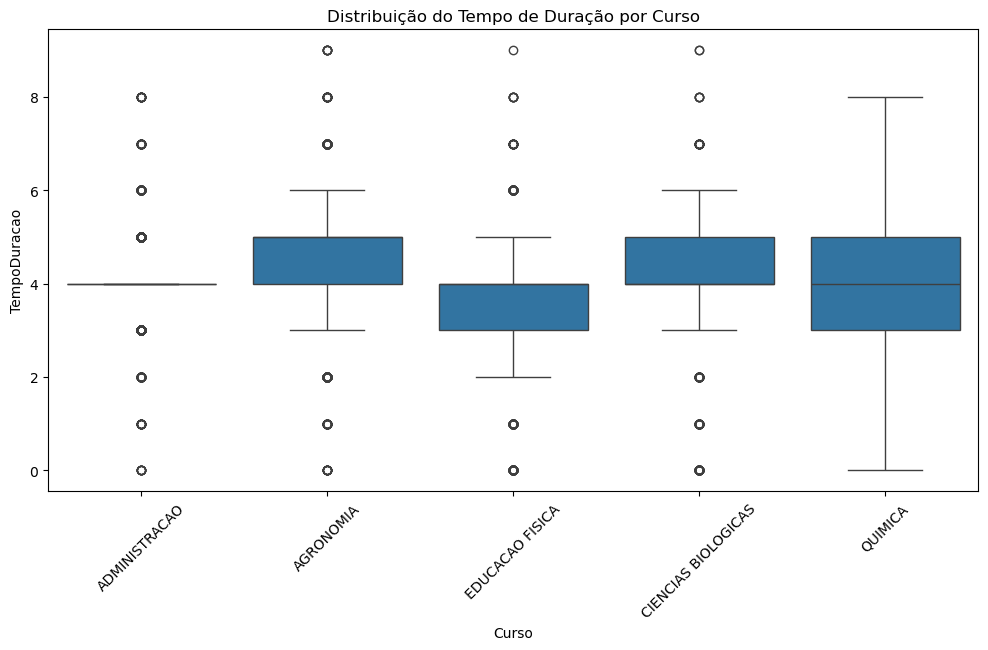

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Curso', y='TempoDuracao', data=dfQ11)
plt.xticks(rotation=45)
plt.title('Distribuição do Tempo de Duração por Curso')
plt.show()


### Conclusão 11

Para fazermos essa analise foi necessário coletar as informações de tempo de duração de cada curso, disponibilizado pela propria coordenação de cada curso no site de dominio Universidade Federal de Viçosa.
Fazendo essa pesquisa obtivemos que:
- 